# The Zalando python client
Shopping is probably in the top-5 of things I hate. Walking from store to store, having to wade through endless clothes you are NOT interested in - it's a really inefficient experience. Luckily I found Zalando a few years ago: you order your clothes online with free shipping and free returns. The only thing that could make this experience even better for me is if I could specify some rules and find the clothes I wanted in exactly my fit. This is why I created the Zalando python API client. 

### The API and querying
Zalando's api is very well documented with a [Swagger specification](https://api.zalando.com/swagger/index.html). 
As you can see the API returns items after you make a request with a query string. I decided to create a zalandoQuery class to specify what items you want to see. Making it a class gives new users of the library an idea of what they can do with the API without having to dive in the specifications. 

### The Python client
To get the items I created a zalandoClient class. This class has a generator function that returns items if you pass it a zalandoQuery. The reason I chose a generator is that some queries might yield very big results (perhaps you want to go through all shirts till you find a very specific one). Making it a generator means that you as programmer can create a query, but stop going through items while the API did not return all items. 

### Helper functions
There are some functions I believe programmers want to use when programming their own shopping scripts. Some of these will mostly make sense to me like the ```is_denim(item)``` or ```is_slim_fit(item)``` function. Others will probably be useful for everyone, like the ```size_in_stock(item,size_str)``` or ```has_attribute(item,attributename,attributevalue)``` functions. 

### Jupyter notebook shopping experience
Although I love shopping with Python, I would like to see my products before I order them. To demonstrate the API I created this jupyter notebook in which I show several queries and results. Let's start by saying I want to buy a new pair of pants. 

In [1]:
%matplotlib inline
import requests # <- make sure you install requests
import json
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

from zalandoclient.zalandoQuery import *
from zalandoclient.zalandoClient import *

### Build the query
Let's start by entering my age, gender, sizes, and the price range in which I'm searching. 

In [2]:

query_builder = zalandoQuery()
query_builder.setAgeGroup("adult")
query_builder.setGender("male")
query_builder.setLength(36)
query_builder.setSize(32)
query_builder.setPriceRange(0,50)

myquery = query_builder.build_query()

json_data = get_articles(query_builder)
page_count = json_data['totalPages']
print(myquery + " gives " + str(page_count) + " pages of results")

https://api.zalando.com/articles?ageGroup=adult&gender=male&length=36&size=32&price=0-50 gives 13 pages of results


### Viewing the products
Wow, 13 pages of results for the pants that I'm searching. Clicking every URL is a lot of work, so I define some Matplotlib visualisation functions to see the products I searched for:

In [3]:
def show_images_product(item):
    images = []
    for url in get_image_urls(item):
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        images.append(img)
    show_images(images)

def show_images(images):
    count = len(images)
    single_figure_size = 13
    fig = plt.figure(figsize=(single_figure_size,count*single_figure_size))
    for subplot in range(1,count+1):
        plt.subplot(100+count*10+subplot)
        plt.imshow(images[subplot-1])
    plt.show()

### Getting items
We defined the query, let's see what Zalando has in store. 

Note that I'm located in the Netherlands. The function that yields articles has two arguments that default to my preferences, but might be annoying for you. Make sure you look at the parameters ```get_articles(zalandoquery ,language='nl-NL' ,clientname="rolandisshopping")``` expects when you use it. 

https://www.zalando.nl/produkt-pktakm-cargobroek-py522e00t-b11.html


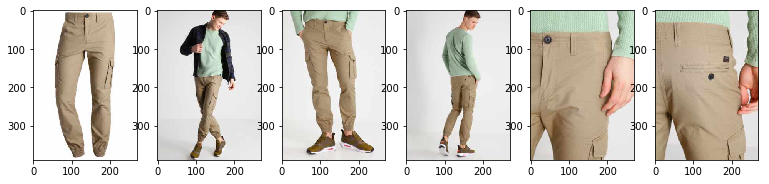

Costs: 31.95 from 39.95
binnenlengte: ['76 cm bij maat 31x32']
buitenlengte: ['100 cm bij maat 31x32']
--------------------
https://www.zalando.nl/tom-tailor-uni-travis-chino-to222e02r-c11.html


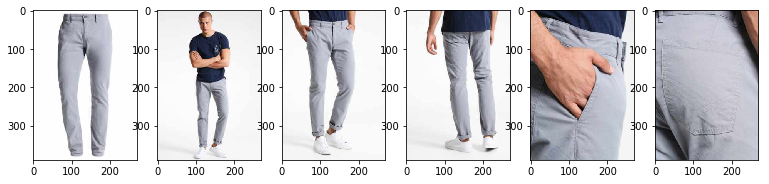

Costs: 39.95 from 39.95
binnenlengte: ['81 cm bij maat 31x32']
buitenlengte: ['106 cm bij maat 31x32']
--------------------
https://www.zalando.nl/produkt-cargobroek-forest-night-py522e00t-m11.html


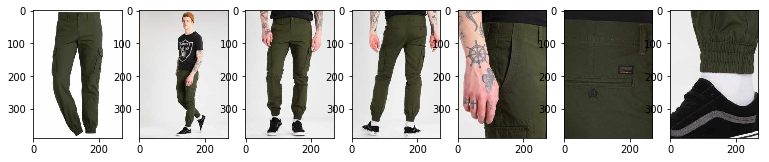

Costs: 31.95 from 39.95
binnenlengte: ['76 cm bij maat 31x32']
buitenlengte: ['97 cm bij maat 31x32']
--------------------
https://www.zalando.nl/pier-one-pantalon-beige-pi922ea16-b11.html


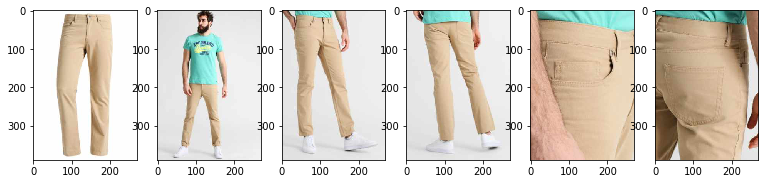

Costs: 22.95 from 22.95
binnenlengte: ['78 cm bij maat 32x32']
buitenlengte: ['104 cm bij maat 32x32']
--------------------
https://www.zalando.nl/pier-one-chino-beige-pi922ea14-b11.html


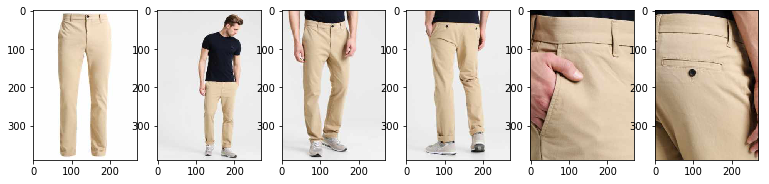

Costs: 27.95 from 27.95
binnenlengte: ['79 cm bij maat 32x32']
buitenlengte: ['106 cm bij maat 32x32']
--------------------


In [4]:
items_displayed = 0
for item in get_articles_all_pages(query_builder):
    if not is_slim_fit(item) and size_in_stock(item,'32x36') and not is_denim(item):
        print(get_url(item))
        show_images_product(item)
        price, originalprice = get_the_price(item)
        print("Costs: " + str(price) + " from " + str(originalprice))
        print('binnenlengte: ' + str(get_attribute(item,'binnenbeenlengte')))
        print('buitenlengte: ' + str(get_attribute(item,'buitenbeenlengte')))
        print("-"*20)
        items_displayed +=1
    if items_displayed >= 5: # For show purpose, stop viewing more than five articles
        break

        

### Attributes
In the example above you saw that I showed the size of the legs (I'm a long guy, or as I like to say: a big data scientist). There are many attributes an item can have. If you want to know the attributes the items have of the query you entered you can use this function I wrote:


In [5]:
def print_attributes(item):
    for attribute in item['attributes']:
        print(attribute['name'] + " -> " + str(attribute['values']))

items_displayed = 0
for item in get_articles_all_pages(query_builder):
    if not is_slim_fit(item) and size_in_stock(item,'32x36') and not is_denim(item):
        print_attributes(item)
        print("-"*30)
        items_displayed += 1
    
    if items_displayed >= 2: # For show purpose, stop viewing more than two articles
        break
        

Materiaal buitenlaag -> ['100% katoen']
Pasvorm -> ['tapered leg']
wasvoorschrift -> ['machinewas tot 40°C']
broekzakken -> ['cargozakken', 'achterzakken', 'zijzakken']
binnenbeenlengte -> ['76 cm bij maat 31x32']
sluiting -> ['verborgen rits']
patroon -> ['effen']
heuphoogte -> ['hoog']
Lichaamslengte model -> ['Ons model is 187 cm groot en draagt maat 31x32']
buitenbeenlengte -> ['100 cm bij maat 31x32']
pasvorm -> ['We raden je aan een maat groter te bestellen']
lengte -> ['enkelhoogte']
------------------------------
Materiaal buitenlaag -> ['75% katoen, 25% polyamide']
Pasvorm -> ['tapered leg']
Details -> ['steekzakken']
wasvoorschrift -> ['machinewas tot 40°C', 'niet geschikt voor de droger']
broekzakken -> ['achterzakken', 'zijzakken']
binnenbeenlengte -> ['81 cm bij maat 31x32']
sluiting -> ['verborgen rits']
patroon -> ['effen']
heuphoogte -> ['normaal']
Lichaamslengte model -> ['Ons model is 184 cm groot en draagt maat 31x32']
buitenbeenlengte -> ['106 cm bij maat 31x32']
le

### Cheapest product
Now let's see what else we can do with the API by bargain hunting. You can get the cheapest products (under 6 euros) and see how expensive they were before!

In [6]:
query_builder = zalandoQuery()
query_builder.setPriceRange(0,6)

cheapest = []
for item in get_articles_all_pages(query_builder):
    the_url = get_url(item)
    price, originalprice = get_the_price(item)
    cheapest.append((price,originalprice,the_url))
    
cheapest.sort()
for item in cheapest[:5]:
    print(str(item[0]) + " was: " + str(item[1]) + " - " + item[2])   

4.45 was: 8.95 - https://www.zalando.nl/brooklyn-s-own-by-rocawear-3-pack-sokken-khaki-black-bh682fa0q-n11.html
4.45 was: 8.95 - https://www.zalando.nl/esprit-sokken-fuchsia-es183d003-g11.html
4.5 was: 4.5 - https://www.zalando.nl/next-2-pack-sokken-grey-navy-nx384d00i-c11.html
4.75 was: 5.95 - https://www.zalando.nl/stups-organic-sokken-white-s1v53aa01-a11.html
4.75 was: 5.95 - https://www.zalando.nl/stups-organic-wanten-white-s1v53aa03-a11.html


### Exploring categories
Zalando has many categories in their API, which is a lot of fun to see. Just how many categories there are can be found by calling another function I implemented: 

In [7]:
allcategories = get_possible_category_keys()
print(str(len(allcategories)) + " categories found: ")
#print(allcategories)

2248 categories found: 


# Conclusion
Zalando had a positive inpact on my clothing style. Writing this client was a lot of fun and hopefully also helps someone else. The code can be found on [github](https://github.com/rmeertens/zalandoclient), and it is also available as pip package by invoking ```pip install zalandoclient```. If you have any questions, don't be afraid to send me a message!